# 3.0 Exploratory Data Analysis for the Edft_coh_iqr_df dataset

## Notebook Setup: Imports and Configuration

In [1]:
# ─────────────────────────────
# Standard Library Imports
# ─────────────────────────────
import os
import sys
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# ─────────────────────────────
# Adjust sys.path for Local Modules
# ─────────────────────────────
src_dir = os.path.abspath(os.path.join('..', '..', 'src'))
if src_dir not in sys.path:
    sys.path.append(src_dir)

# ─────────────────────────────
# Project-Specific Imports
# ─────────────────────────────
from settings import *
from vis import * 
from utils import *
# ─────────────────────────────
# Define Paths and Load Data
# ─────────────────────────────
dacs_energies_out_dir = '../../../data/external/dacs_energies_out'

Edft_coh_df = pd.read_csv(os.path.join(dacs_energies_out_dir, 'Edft_coh_df.csv'))  
Edft_coh_iqr_df = pd.read_csv(os.path.join(dacs_energies_out_dir, 'Edacs_dft.csv'))  


In [2]:
Edft_coh_df.shape

(1218, 19)

In [3]:
Edft_coh_iqr_df.shape

(909, 151)

## Export the outliers 

In [4]:
# Filter for `system_dacs` that are in Edft_coh_df but not in Edft_coh_iqr_df
unique_system_dacs = Edft_coh_df[~Edft_coh_df['system_dacs'].isin(Edft_coh_iqr_df['system_dacs'])]

# Specify the directory and filename for saving
output_path = '../../../data/external/dacs_energies_out/outliers_dacs_final.csv'

# Save the filtered data to CSV 
unique_system_dacs.to_csv(output_path, index=False)

## Boxplot Metal Edft_coh_iqr_df

In [5]:
fig = plot_categorical_energy_boxplot(
    df=Edft_coh_iqr_df,
    x_col='M1',
    color_map=metal_colors,
    y_col='E_dft_M1M2',
    hover_col='system_dacs',
    x_title='Metal',
    y_title='E_dft_M1M2 Energy',
    file_name='Edft_boxplot_iqr'
)


fig.show()



## Summary statistics metal Edft_coh_iqr_df

In [6]:
metal_summary = Edft_coh_iqr_df.groupby('M1')['E_dft_M1M2'].describe()
print(metal_summary)

    count      mean       std       min       25%       50%       75%  \
M1                                                                      
Ag   67.0 -1.590142  1.172672 -4.606277 -2.307277 -1.706277 -0.761277   
Au   65.0 -2.065450  1.493468 -5.091573 -3.074573 -2.282573 -1.017573   
Cd   61.0 -2.003158  0.981380 -4.379224 -2.613224 -2.000224 -1.275224   
Co   60.0 -3.110393  1.733843 -7.418843 -4.019843 -2.924843 -2.078093   
Cu   68.0 -2.630194  1.357916 -5.917694 -3.467944 -2.686194 -1.752194   
Fe   67.0 -3.002461  1.866770 -7.516565 -4.110565 -2.846565 -1.767565   
Ir   69.0 -2.485329  1.679749 -6.720199 -3.614199 -2.353199 -1.563199   
Ni   68.0 -3.519832  1.673978 -7.615494 -4.584744 -3.414994 -2.564244   
Os   63.0 -1.730333  1.819392 -5.901905 -2.875404 -1.691904 -0.551905   
Pd   67.0 -2.872197  1.327546 -5.993779 -3.681779 -3.005779 -2.093279   
Pt   64.0 -3.316826  1.343690 -6.210764 -4.241264 -3.328764 -2.313014   
Rh   62.0 -2.692654  1.426102 -6.647461 -3.569711 -

## Boxplot Cavity Edft_coh_iqr_df

In [7]:
fig = plot_categorical_energy_boxplot(
    df=Edft_coh_iqr_df,
    x_col='cavity_v2',
    color_map=cavity_colors,
    y_col='E_dft_M1M2',
    hover_col='system_dacs',
    x_title='Cavity',
    y_title='E_dft_M1M2 Energy',
    file_name='Edft_boxplot_iqr'
)

fig.show()

## Summary statistics cavity Edft_coh_iqr_df

In [8]:
cavity_summary = Edft_coh_iqr_df.groupby('cavity_3')['E_dft_M1M2'].describe()
print(cavity_summary)

          count      mean       std       min       25%       50%       75%  \
cavity_3                                                                      
0          27.0 -2.947073  2.838842 -7.516565 -5.615272 -1.729494 -0.774342   
1          75.0 -2.055367  2.198270 -7.473565 -3.225409 -1.660565 -0.730695   
2         286.0 -2.108220  1.613133 -7.615494 -3.055756 -2.193901 -1.093390   
3         237.0 -2.552935  1.377543 -6.462494 -3.606199 -2.497494 -1.540277   
4         185.0 -2.949795  1.072999 -6.084494 -3.576694 -2.907461 -2.175277   
5          59.0 -3.253152  1.095970 -5.585494 -3.971638 -3.156224 -2.416866   
6          40.0 -3.844554  1.184949 -6.383494 -4.279859 -3.751766 -3.063931   

               max  
cavity_3            
0         1.875435  
1         2.564095  
2         1.538095  
3         0.897095  
4        -0.476905  
5        -0.956905  
6        -1.616224  


## Count cavity categories 

In [9]:
din4_x2_count = Edft_coh_iqr_df['cavity_v2'].str.contains('din4_x2').sum()
print(din4_x2_count)

256


In [10]:
din6_s_count = Edft_coh_iqr_df['cavity_v2'].str.contains('din6_s').sum()
print(din6_s_count)

163


In [11]:
din6_as_count = Edft_coh_iqr_df['cavity_v2'].str.contains('din6_as').sum()
print(din6_as_count)

490


## Count number of carbons for each cavity type

This code filters the dataset to include only rows where the `cavity_v2` column contains the substring `'din4_x2'`, `'din6_s'`, and `'din6_as'`. It then groups the filtered data by the `'cavity_3'` category and computes descriptive statistics for the `'E_dft_M1M2'` energy values within each group. 

In [12]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din4_x2')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(256, 151)
cavity_3      0      1      2      3      4      5      6
count     13.00  24.00  78.00  46.00  63.00  20.00  12.00
mean      -5.62  -4.19  -3.50  -3.47  -3.84  -4.29  -5.26
std        1.24   2.28   1.64   1.63   0.98   0.75   0.85
min       -7.52  -7.47  -7.62  -6.46  -6.08  -5.59  -6.38
25%       -6.46  -6.05  -4.65  -4.68  -4.45  -5.08  -5.95
50%       -5.64  -4.08  -3.64  -3.58  -3.85  -4.10  -5.30
75%       -5.03  -3.32  -2.23  -2.15  -3.21  -3.89  -4.62
max       -3.35   0.34  -0.20  -0.50  -1.61  -3.12  -4.08


In [13]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din6_s')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(163, 151)
cavity_3     0      1      2      3      4      5      6
count     1.00  10.00  49.00  36.00  40.00  13.00  14.00
mean      1.88   0.89   0.08  -0.90  -1.99  -2.64  -3.65
std        NaN   0.82   0.68   0.61   0.59   0.44   0.51
min       1.88  -0.30  -1.37  -2.23  -3.22  -3.39  -4.61
25%       1.88   0.50  -0.30  -1.28  -2.33  -2.92  -3.97
50%       1.88   0.70   0.02  -0.95  -1.91  -2.65  -3.77
75%       1.88   1.40   0.50  -0.60  -1.57  -2.37  -3.23
max       1.88   2.56   1.54   0.90  -0.48  -1.82  -2.77


In [14]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din6_as')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(490, 151)
cavity_3      0      1       2       3      4      5      6
count     13.00  41.00  159.00  155.00  82.00  26.00  14.00
mean      -0.65  -1.53   -2.10   -2.66  -2.73  -2.76  -2.83
std        0.73   0.78    0.90    1.07   0.77   0.99   0.60
min       -1.73  -3.23   -4.27   -4.59  -4.26  -4.39  -3.78
25%       -1.03  -1.96   -2.68   -3.59  -3.30  -3.63  -3.10
50%       -0.82  -1.62   -2.25   -2.71  -2.81  -2.63  -2.92
75%       -0.07  -0.97   -1.45   -1.97  -2.21  -2.20  -2.48
max        0.81   0.01    0.59    0.08  -0.94  -0.96  -1.62


## Count the number of metals for each cavity type

Filter the DataFrame to include only rows where the 'cavity_v2' column contains `din4_x2`, `din6_s`, and `din6_as`.  Then, group the filtered data by the metal type in column 'M1' and generate descriptive statistics for the 'E_dft_M1M2' energy values. 

In [15]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din4_x2')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(256, 151)
M1        Ag     Au     Cd     Co     Cu     Fe     Ir     Ni     Os     Pd  \
count  19.00  20.00  18.00  14.00  20.00  16.00  20.00  18.00  21.00  20.00   
mean   -2.22  -2.89  -2.45  -5.55  -3.34  -5.50  -4.35  -5.47  -3.66  -4.06   
std     1.40   1.57   1.18   0.95   1.58   1.13   1.14   1.10   1.11   0.98   
min    -4.61  -5.09  -4.38  -7.42  -5.92  -7.52  -6.72  -7.62  -5.90  -5.99   
25%    -3.38  -4.07  -3.14  -6.02  -4.27  -5.95  -5.02  -6.31  -4.10  -4.64   
50%    -2.34  -3.20  -2.33  -5.29  -3.49  -5.16  -3.92  -5.35  -3.51  -3.84   
75%    -1.25  -2.01  -1.61  -4.93  -1.85  -4.64  -3.65  -4.87  -2.92  -3.50   
max     0.26   0.34  -0.64  -4.38  -0.20  -4.27  -2.54  -3.10  -2.09  -2.07   

M1        Pt     Rh     Ru     Zn  
count  21.00  13.00  16.00  20.00  
mean   -4.50  -4.54  -3.78  -3.15  
std     1.05   1.08   0.86   1.39  
min    -6.21  -6.65  -6.00  -5.54  
25%    -5.15  -5.06  -4.11  -4.27  
50%    -4.38  -4.08  -3.67  -2.95  
75%    -3.97  -3.86  -3.2

In [16]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din6_s')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(163, 151)
M1        Ag     Au     Cd     Co     Cu     Fe     Ir     Ni    Os     Pd  \
count  12.00  13.00  10.00  12.00  13.00  14.00  12.00  13.00  9.00  12.00   
mean   -0.75  -0.75  -1.69  -1.14  -1.24  -0.99  -0.76  -1.46  0.36  -1.41   
std     1.27   1.59   1.02   1.22   1.20   1.44   1.57   1.28  1.66   1.36   
min    -3.06  -3.97  -3.21  -3.67  -3.29  -3.99  -3.81  -3.84 -2.77  -4.10   
25%    -1.73  -1.50  -2.40  -1.65  -2.11  -1.56  -1.96  -2.42 -0.48  -2.19   
50%    -0.80  -0.76  -1.83  -1.18  -1.05  -0.91  -0.37  -1.20  0.90  -1.13   
75%     0.20   0.37  -1.14  -0.26  -0.25  -0.37   0.57  -0.47  1.45  -0.22   
max     0.98   1.56   0.13   0.61   0.79   1.88   1.09   0.57  2.56   0.20   

M1       Pt     Rh     Ru     Zn  
count  8.00  12.00  13.00  10.00  
mean  -2.10  -1.36  -0.54  -2.16  
std    1.47   1.42   1.35   1.13  
min   -4.61  -3.97  -3.06  -3.73  
25%   -3.09  -2.53  -1.67  -3.16  
50%   -1.80  -0.93  -0.35  -2.07  
75%   -1.31  -0.04   0.40  -1.37  
max   

In [17]:
# Filter the DataFrame based on the condition
filtered_df = Edft_coh_iqr_df[Edft_coh_iqr_df['cavity_v2'].str.contains('din6_as')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)


(490, 151)
M1        Ag     Au     Cd     Co     Cu     Fe     Ir     Ni     Os     Pd  \
count  36.00  32.00  33.00  34.00  35.00  37.00  37.00  37.00  33.00  35.00   
mean   -1.53  -2.08  -1.86  -2.80  -2.74  -2.68  -2.04  -3.30  -1.07  -2.70   
std     0.78   0.98   0.78   0.69   0.82   0.80   0.86   0.79   0.92   0.82   
min    -2.79  -3.58  -3.10  -4.03  -3.98  -4.11  -3.61  -4.59  -2.72  -4.05   
25%    -2.18  -2.88  -2.42  -3.28  -3.36  -3.32  -2.73  -3.93  -1.72  -3.31   
50%    -1.58  -2.30  -1.96  -2.86  -2.82  -2.66  -1.90  -3.33  -1.11  -2.65   
75%    -0.92  -1.35  -1.25  -2.34  -2.12  -2.14  -1.56  -2.76  -0.35  -2.20   
max     0.03  -0.04   0.12  -1.56  -1.03  -1.28  -0.17  -1.73   0.81  -0.91   

M1        Pt     Rh     Ru     Zn  
count  35.00  37.00  37.00  32.00  
mean   -2.88  -2.48  -1.63  -3.11  
std     0.92   0.76   0.78   0.90  
min    -4.41  -3.85  -3.01  -4.48  
25%    -3.64  -3.02  -2.23  -3.79  
50%    -2.78  -2.40  -1.61  -3.28  
75%    -2.28  -1.98  -0.9

## Histogram of DFT adsorption energy by metal

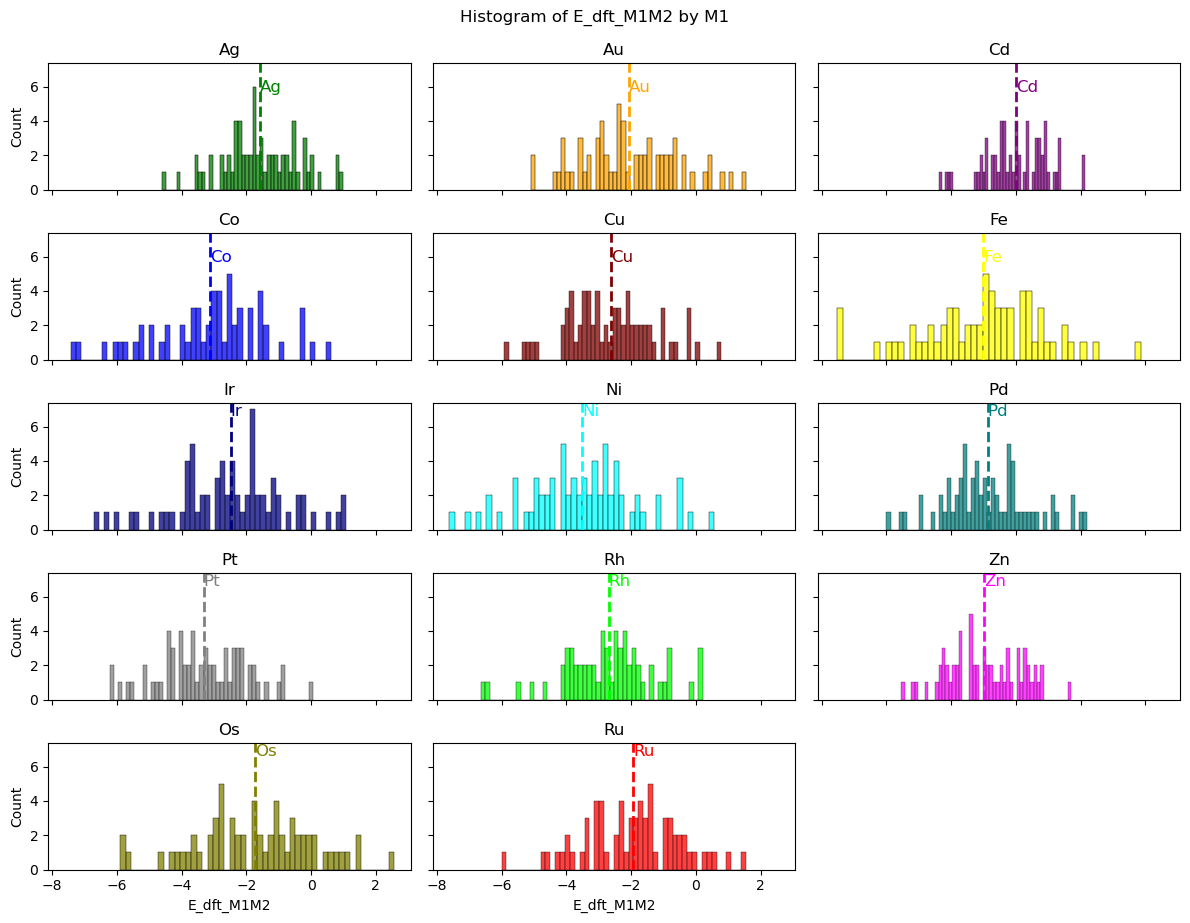

In [18]:
plot_energy_histograms_by_metal(
    df=Edft_coh_iqr_df,
    metal_col='M1',
    energy_col='E_dft_M1M2',
    color_map=metal_colors,
    save_dir='../../../data/figures/sacs_eda',
    file_name='hist_metal_Edft_coh_iqr'
)
